# AAAAAAAAAAAAAAAAAAAA

In [22]:
# 为什么只统计发病到首次影像检查时间间隔与体积的关系 而不涉及其他的随访记录 论文中有详细说明
import pandas as pd
table1 = pd.read_excel("表1-患者列表及临床信息.xlsx")
table1.head()

,Unnamed: 0,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,0,2.5,180/90,0,1,1,1,1,1,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,0,3.0,199/120,0,1,1,1,0,1,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,0,2.0,199/120,0,1,1,1,1,1,1
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,0,1.0,186/99,0,1,1,1,0,0,0
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,0,5.0,135/92,0,1,1,0,0,1,1


In [23]:
table2 = pd.read_excel("表2-患者影像信息血肿及水肿的体积及位置.xlsx")
table2.head()

,ID,入院首次影像检查流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,20161212002136,69714,0.000258,0.877112,0.120148,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,47500,0.496000,0.180779,0.302316,0.000000,0.0,0.003032,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,86396,0.053718,0.829078,0.099681,0.000197,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,45498,0.002242,0.002198,0.029100,0.000374,0.0,0.163458,0.313618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,14832,0.000000,0.000000,0.001146,0.000337,0.0,0.000202,0.413363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 基于"首次影像检查流水号"合并两个表格
merged_data = pd.merge(table2, table1[['入院首次影像检查流水号', '发病到首次影像检查时间间隔']], left_on='入院首次影像检查流水号', right_on='入院首次影像检查流水号', how='left')
# 不知道为啥合并后sub003和004重复出现两行 只能这样强制删除 并重置索引 此外 表1数据有误 sub074的‘入院首次影像检查流水号'应改成 20180719000020 不然合并后会出现NaN缺失项
merged_data.drop(3, inplace=True)
merged_data.drop(5, inplace=True)
merged_data.reset_index(inplace=True)
merged_data=merged_data.drop(['index'],axis = 1)

# 取前100名患者指定字段
filtered_data = merged_data.loc[merged_data['ID'].str[-3:].astype(int) < 101, ['ID','入院首次影像检查流水号', 'ED_volume', '发病到首次影像检查时间间隔']]
filtered_data

,ID,入院首次影像检查流水号,ED_volume,发病到首次影像检查时间间隔
0,sub001,20161212002136,48919,2.5
1,sub002,20160406002131,23526,3.0
2,sub003,20160413000006,32621,2.0
3,sub004,20161215001667,22191,1.0
4,sub005,20161222000978,47392,5.0
...,...,...,...,...
95,sub096,20180802001789,5951,1.0
96,sub097,20181010000767,10227,3.0
97,sub098,20180612002507,39868,2.5
98,sub099,20180620002296,9653,3.0


In [25]:
# filtered_data=filtered_data.dropna()
# filtered_data

1次多项式拟合的R2为:0.133368709505574


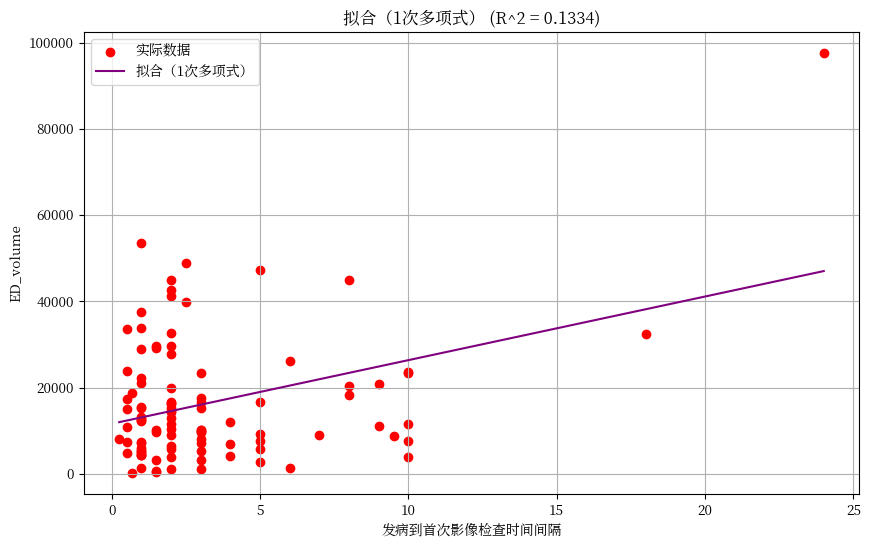

2次多项式拟合的R2为:0.2903459522266786


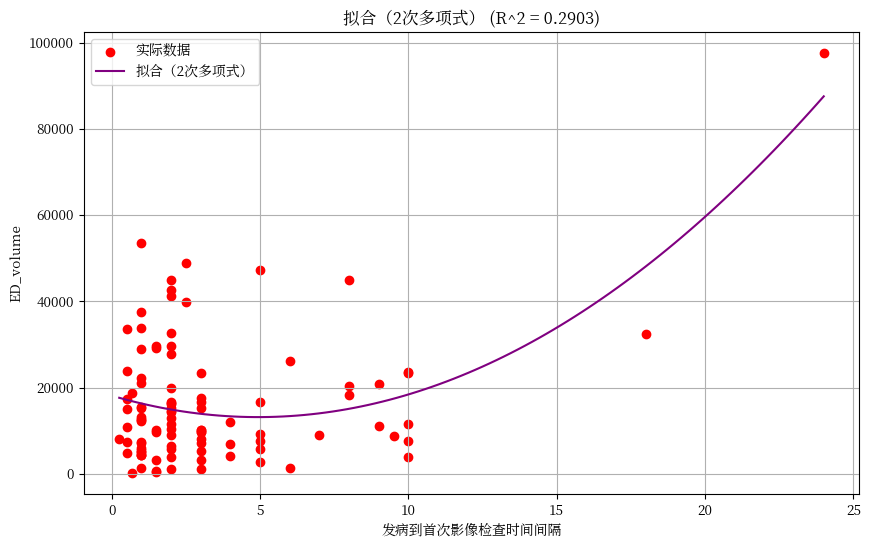

3次多项式拟合的R2为:0.3145310471574365


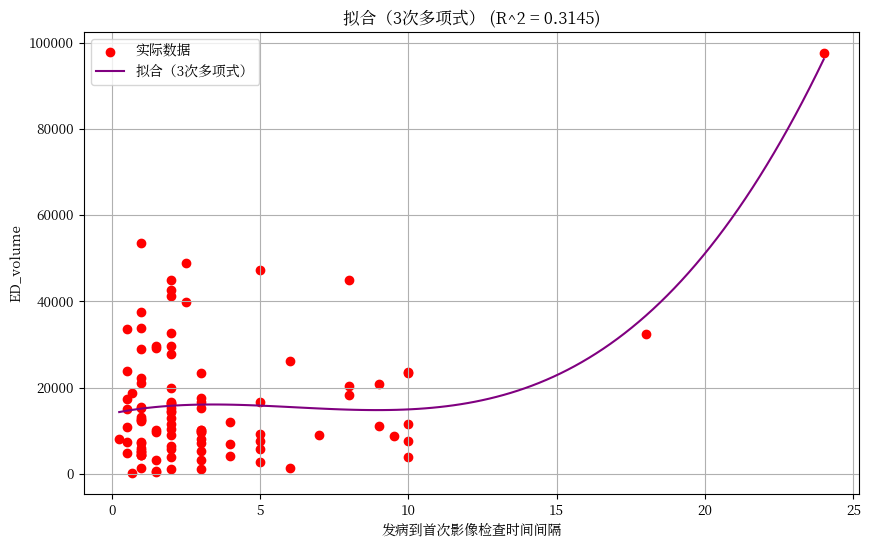

4次多项式拟合的R2为:0.3159323768079423


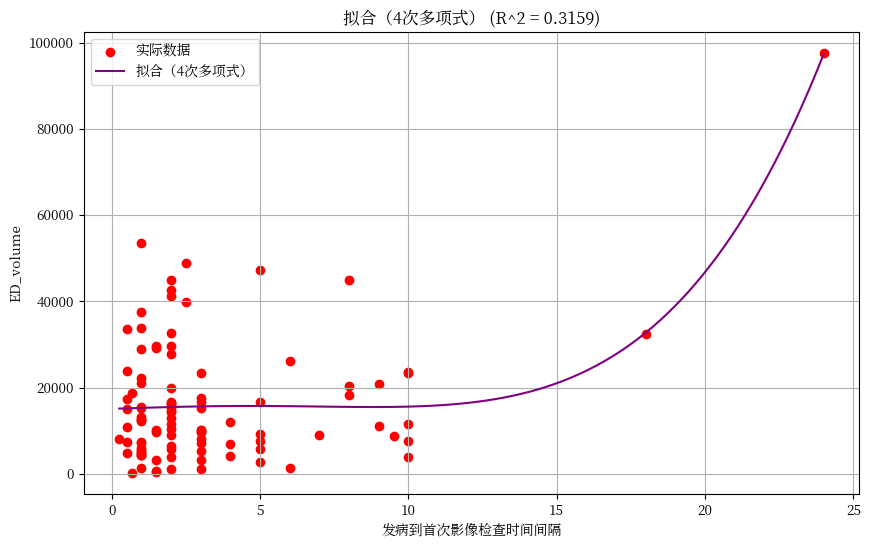

5次多项式拟合的R2为:0.31751232377293215


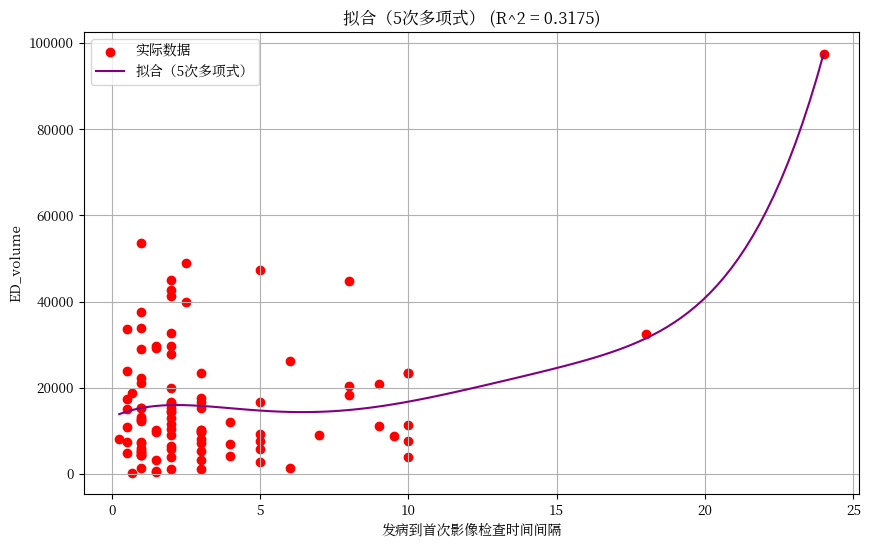

6次多项式拟合的R2为:0.33656940660417045


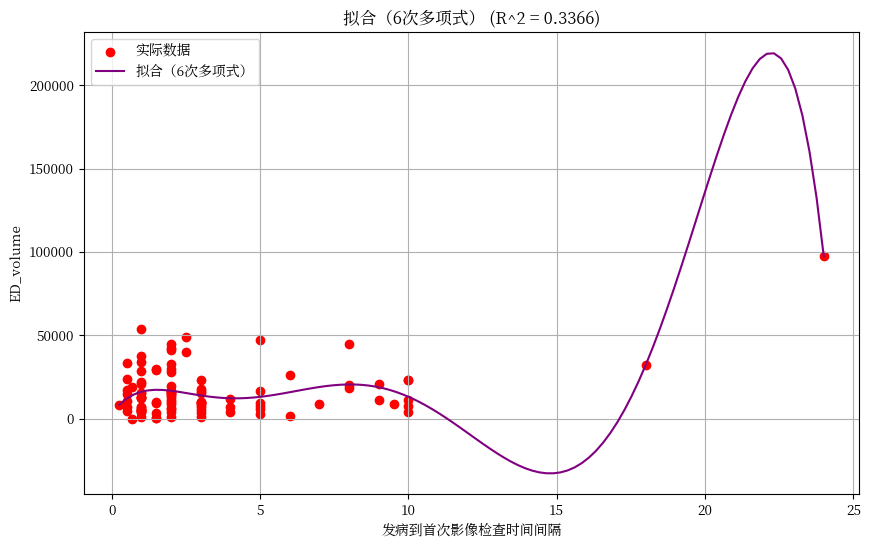

7次多项式拟合的R2为:0.3400267603137619


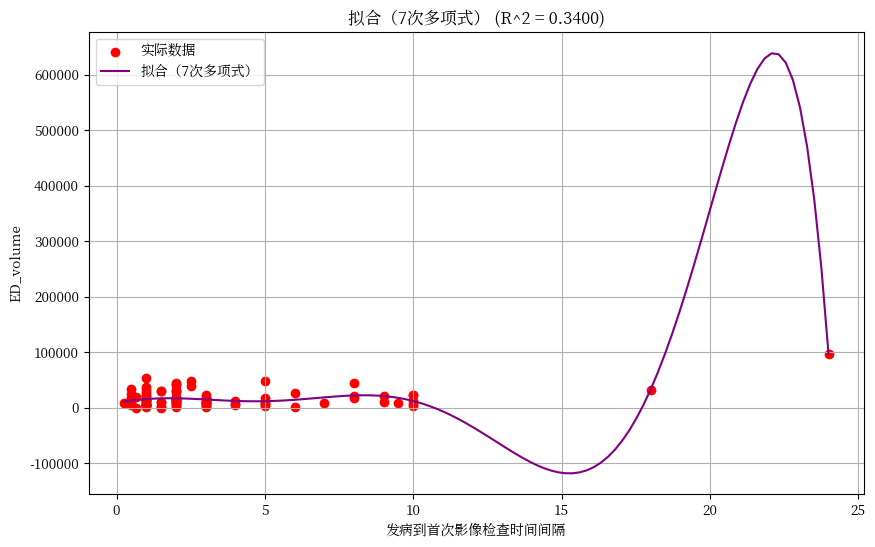

8次多项式拟合的R2为:0.3486269505450602


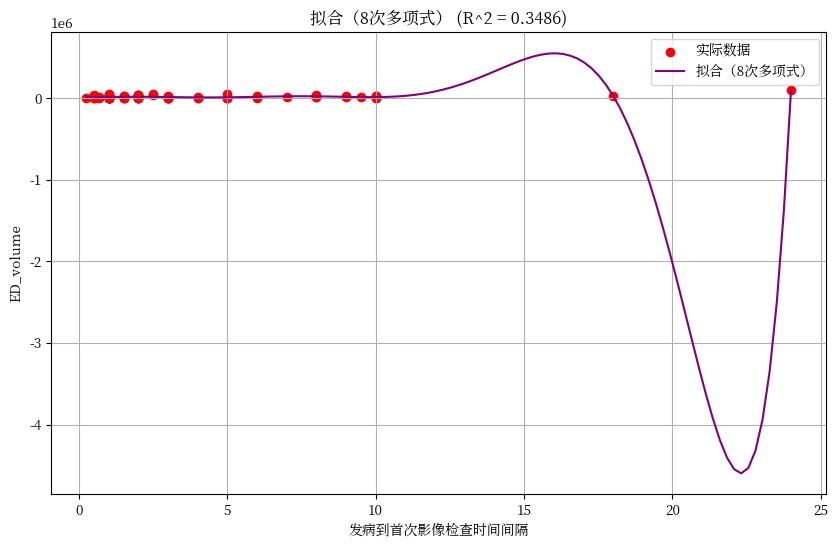

9次多项式拟合的R2为:0.3486668725744334


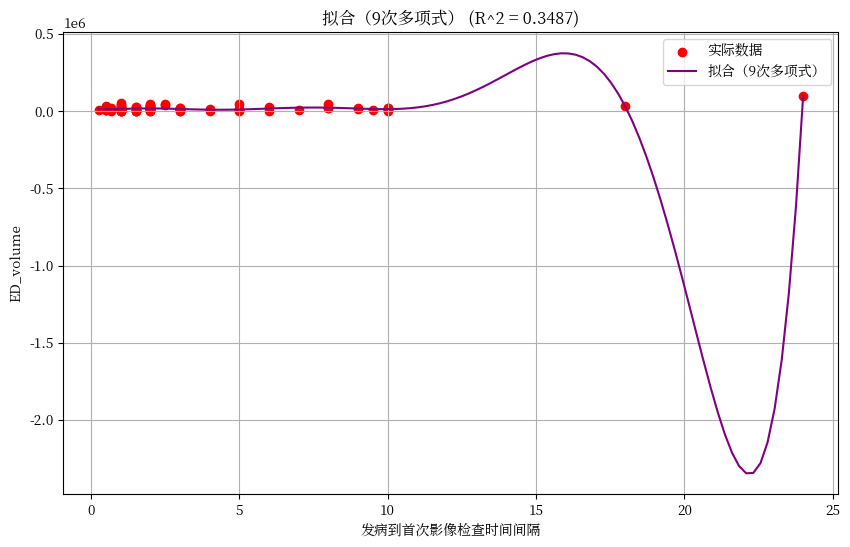

10次多项式拟合的R2为:0.34941789296187153


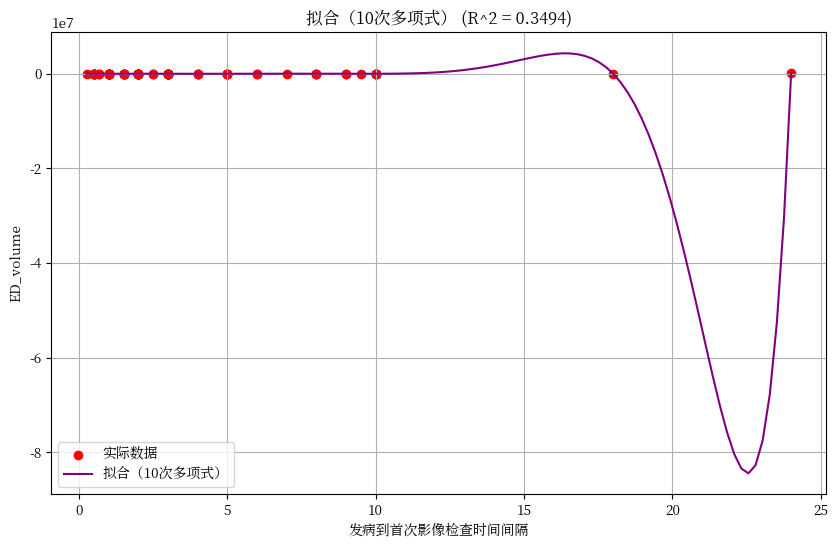

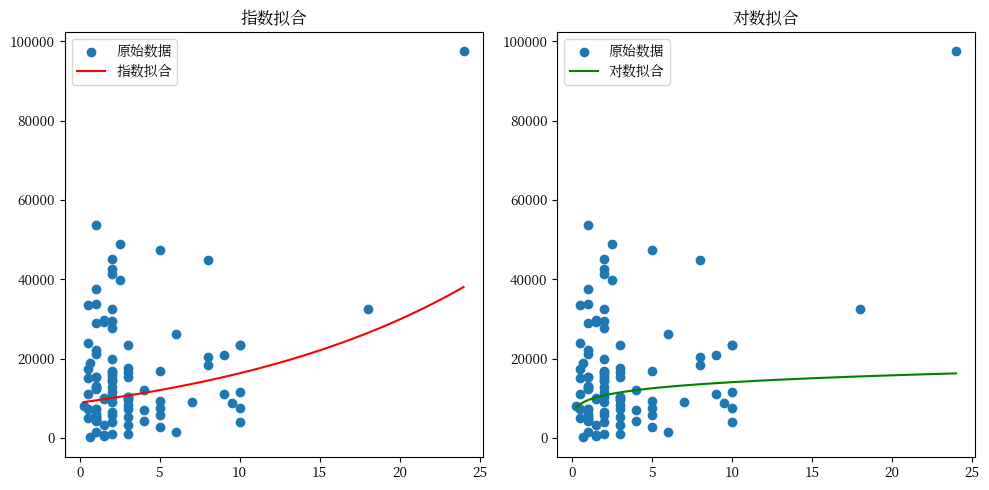

对数拟合的R2为:0.04419422632055714
指数拟合的R2为:0.0202495751487054


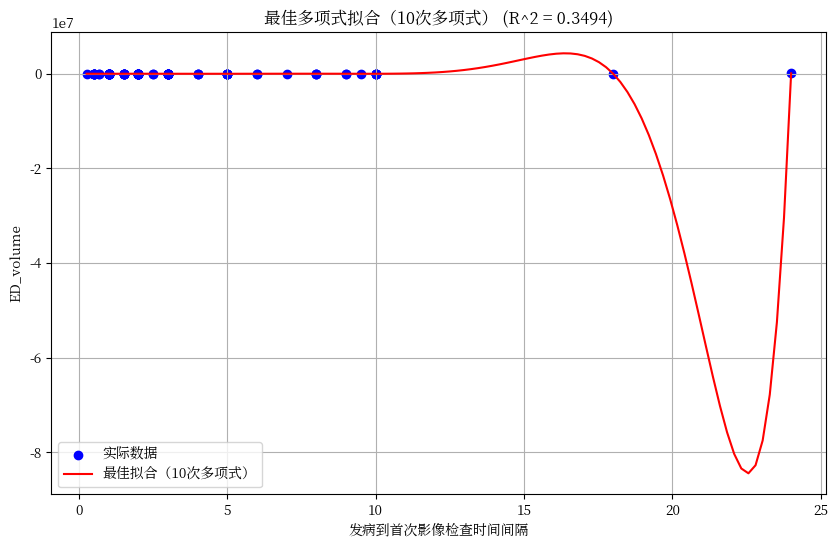

(10, 0.34941789296187153)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Colab环境下配置Matplotlib以支持中文显示
! pip install mplfonts
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init() # Colab首次运行时请解除注释 之后请加上注释
from mplfonts import use_font
use_font('Noto Serif CJK SC')#指定中文字体

# 数据准备
X = filtered_data['发病到首次影像检查时间间隔'].values.reshape(-1, 1)
y = filtered_data['ED_volume'].values

# 对数转换：将对数模型转换为线性模型
X_log = np.log(X)
y_log_transformed = np.log(y)

# 尝试拟合1到10次多项式回归模型
degrees = list(range(1, 11))
models = []
r2_scores = []

for degree in degrees:
    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # 训练线性回归模型
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # 计算R^2分数
    r2 = r2_score(y, y_pred)
    print(f"{degree}次多项式拟合的R2为:{r2}")

    models.append(model)
    r2_scores.append(r2)

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='实际数据')
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    plt.plot(X_range, model.predict(PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X_range)), color='purple', label=f'拟合（{degree}次多项式）')
    plt.xlabel('发病到首次影像检查时间间隔')
    plt.ylabel('ED_volume')
    plt.legend()
    plt.title(f'拟合（{degree}次多项式） (R^2 = {max(r2_scores):.4f})')
    plt.grid(True)
    plt.show()

# 创建线性回归模型并拟合指数数据
model_exp = LinearRegression()
model_exp.fit(X.reshape(-1, 1), np.log(y))
a_exp, b_exp = model_exp.coef_[0], model_exp.intercept_

# 创建线性回归模型并拟合对数数据
model_log = LinearRegression()
model_log.fit(X_log.reshape(-1, 1), y_log_transformed)
a_log, b_log = model_log.coef_[0], model_log.intercept_

# 生成拟合后的曲线数据
x_fit = np.linspace(min(X), max(X), 100)
y_fit_exp = np.exp(a_exp * x_fit + b_exp)
y_fit_log = np.exp(a_log * np.log(x_fit) + b_log)

# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 5))

# 绘制指数拟合结果
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='原始数据')
plt.plot(x_fit, y_fit_exp, 'r', label='指数拟合')
plt.legend()
plt.title('指数拟合')

# 绘制对数拟合结果
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='原始数据')
plt.plot(x_fit, y_fit_log, 'g', label='对数拟合')
plt.legend()
plt.title('对数拟合')

plt.tight_layout()
plt.show()

y_pred = model_exp.predict(X.reshape(-1, 1))
r2 = r2_score(np.log(y), y_pred)
models.append(model_exp)
r2_scores.append(r2)
print(f"对数拟合的R2为:{r2}")

y_pred = model_log.predict(X_log.reshape(-1, 1))
r2 = r2_score(y_log_transformed, y_pred)
models.append(model_log)
r2_scores.append(r2)
print(f"指数拟合的R2为:{r2}")


# 根据R^2值选择最佳模型
best_degree = degrees[np.argmax(r2_scores)]
best_model = models[np.argmax(r2_scores)]

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='实际数据')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_range, best_model.predict(PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X_range)), color='red', label=f'最佳拟合（{best_degree}次多项式）')
plt.xlabel('发病到首次影像检查时间间隔')
plt.ylabel('ED_volume')
plt.legend()
plt.title(f'最佳多项式拟合（{best_degree}次多项式） (R^2 = {max(r2_scores):.4f})')
plt.grid(True)
plt.show()

# 输出最佳模型的阶数和最大R^2值
best_degree, max(r2_scores)


In [27]:
y

array([48919, 23526, 32621, 22191, 47392, 97503, 32434, 14353, 18799,
       15272,  5080, 15254,  9694, 12291,  5759, 28955, 11533, 23890,
       11107,   160, 12852,  5463, 42734,  9317,  9073, 21095,  7286,
       16568, 44907, 18378, 17339,   746,  1500, 10958, 15345, 16707,
       19961,  4386, 16139,  4401,  5169, 12949, 20931, 26140,  6480,
       37663,  5848,  4473,  3955,  8814, 16801,  7036, 16764, 12628,
       15417, 29701,  8044, 11479,  1396, 33604, 15164, 10197,  7625,
        7239, 45074, 20309,  4242, 14681, 41370,  8178, 27830, 10390,
        3974, 29318, 17633, 10154,  9003,  2679,  7317, 12087,  1091,
       33837, 23326,  3216, 53627,  3327,   398, 23528,  9695, 29614,
        5318,  1084,  4923,  7667, 13198,  5951, 10227, 39868,  9653,
        7367])

In [28]:
# 计算残差（实际值与预测值之间的差异）
y_pred = best_model.predict(PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X_range))
residuals = y - y_pred

# 将残差存储在一个数据框中
residuals_df = filtered_data.copy()
residuals_df['残差（全体）'] = residuals
residuals_df[['ID','入院首次影像检查流水号', 'ED_volume', '发病到首次影像检查时间间隔', '残差（全体）']]
residuals_df


,ID,入院首次影像检查流水号,ED_volume,发病到首次影像检查时间间隔,残差（全体）
0,sub001,20161212002136,48919,2.5,3.153317e+04
1,sub002,20160406002131,23526,3.0,1.002721e+04
2,sub003,20160413000006,32621,2.0,1.944280e+04
3,sub004,20161215001667,22191,1.0,7.756833e+03
4,sub005,20161222000978,47392,5.0,3.133114e+04
...,...,...,...,...,...
95,sub096,20180802001789,5951,1.0,7.749001e+07
96,sub097,20181010000767,10227,3.0,6.779309e+07
97,sub098,20180612002507,39868,2.5,5.254923e+07
98,sub099,20180620002296,9653,3.0,3.038839e+07


In [29]:
residuals_df.to_excel('残差（全体）.xlsx')

# BBBBBBBBBBBBBBBB

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn import metrics
# 准备用于聚类的数据
# 从筛选后的数据中选择 '发病到首次影像检查时间间隔' 和 'ED_volume' 两列作为聚类的特征
clustering_data = filtered_data[['发病到首次影像检查时间间隔', 'ED_volume']]

# 对数据进行标准化处理
# 创建一个标准化器对象，用于对数据进行标准化，确保特征在相似的尺度上
scaler = StandardScaler()

# 使用标准化器对选择的特征数据进行标准化处理
clustering_data_scaled = scaler.fit_transform(clustering_data)

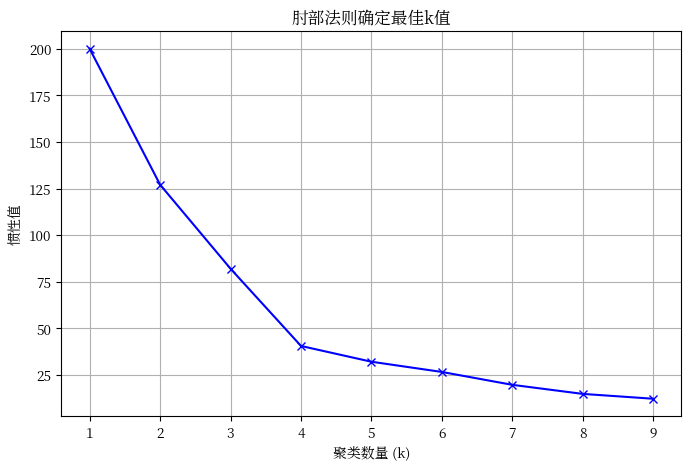

In [31]:
# 使用肘部法则寻找最佳的聚类数量
inertia = []  # 用于存储每个聚类数量下的惯性（inertia）值
K = range(1, 10)  # 尝试的聚类数量范围

# 遍历不同的聚类数量
for k in K:
    # 创建并拟合K均值聚类模型，使用标准化后的数据
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clustering_data_scaled)

    # 计算并记录该模型的惯性值
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 5))  # 设置图形的尺寸
plt.plot(K, inertia, 'bx-')  # 绘制肘部法则曲线，x轴为聚类数量，y轴为惯性值
plt.xlabel('聚类数量 (k)')  # 设置x轴标签
plt.ylabel('惯性值')  # 设置y轴标签
plt.title('肘部法则确定最佳k值')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形

# 聚类评价指标
LK = []# 越大越好
CH = []# 越大越好
DB = []# 越小越好


通过肘部法则，我们可以看到随着聚类数量的增加，误差平方和（inertia）减小的速度开始放缓。在这个图中，理想的聚类数量（k值）是4，因为在这些点之后，误差平方和的减少率开始变得不那么明显。

Kmeans
[0.53027000908404]
[69.7508547764095]
[0.7757775779920446]


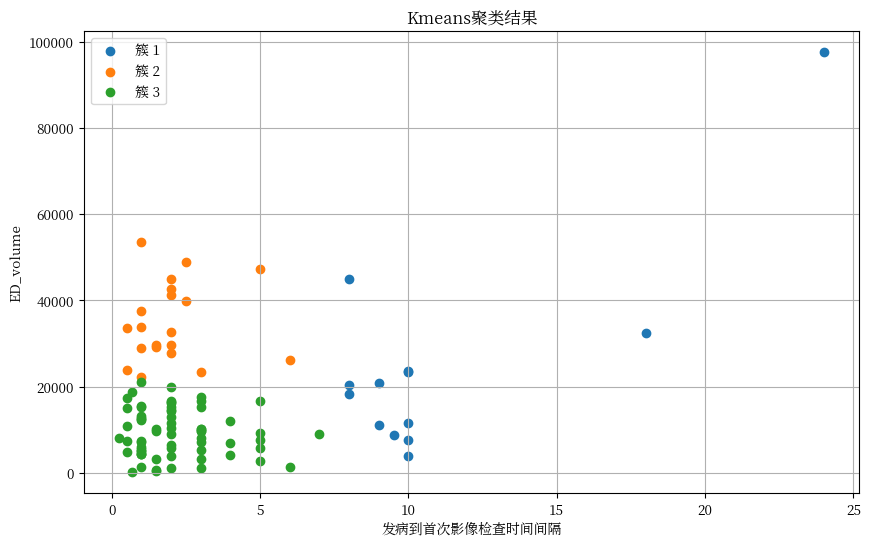

In [32]:
# 应用K均值聚类，选择k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(clustering_data_scaled)  # 使用标准化后的数据进行聚类
labels = kmeans.labels_  # 获取每个数据点所属的簇标签

# 将聚类标签添加到filtered_data数据框中
filtered_data['Cluster'] = labels  # 添加一个名为 'Cluster' 的新列，用于存储聚类标签

print("Kmeans")
LK.append(metrics.silhouette_score(clustering_data_scaled,labels,metric='euclidean'))
CH.append(metrics.calinski_harabasz_score(clustering_data_scaled,labels))
DB.append(metrics.davies_bouldin_score(clustering_data_scaled,labels))
print(LK)
print(CH)
print(DB)

# 绘制聚类结果
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据
    plt.scatter(cluster_data['发病到首次影像检查时间间隔'], cluster_data['ED_volume'], label=f'簇 {i+1}')  # 绘制散点图，每个簇一个颜色

plt.xlabel('发病到首次影像检查时间间隔')  # 设置x轴标签
plt.ylabel('ED_volume')  # 设置y轴标签
plt.legend()  # 显示图例
plt.title('Kmeans聚类结果')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形


MiniBatchKMeans
[0.53027000908404, 0.5483341865810208]
[69.7508547764095, 59.03111335351649]
[0.7757775779920446, 0.7870254674551816]


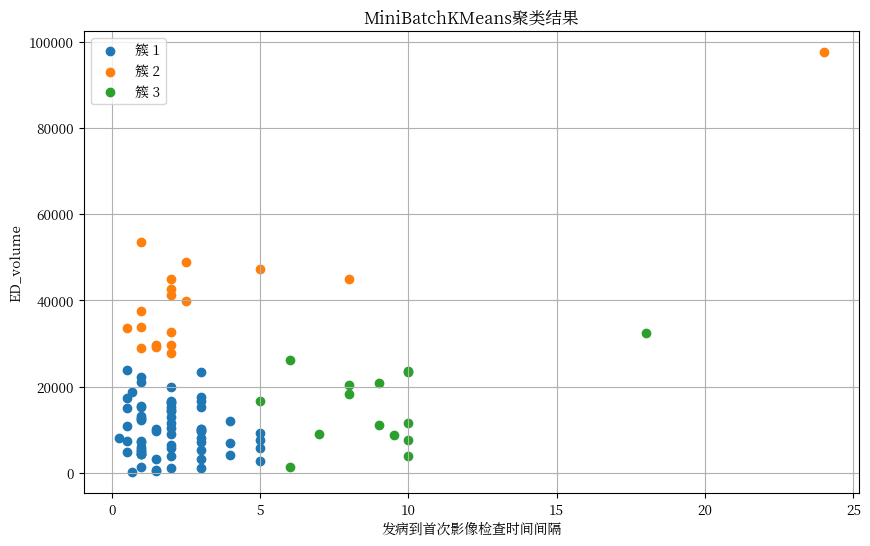

In [33]:
from sklearn.cluster import AffinityPropagation,MiniBatchKMeans,MeanShift,SpectralClustering,AgglomerativeClustering,DBSCAN,Birch
# 应用K均值聚类，选择k=3
minikmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(clustering_data_scaled)  # 使用标准化后的数据进行聚类
labels = minikmeans.labels_  # 获取每个数据点所属的簇标签

# 将聚类标签添加到filtered_data数据框中
filtered_data['Cluster'] = labels  # 添加一个名为 'Cluster' 的新列，用于存储聚类标签

print("MiniBatchKMeans")
LK.append(metrics.silhouette_score(clustering_data_scaled,labels,metric='euclidean'))
CH.append(metrics.calinski_harabasz_score(clustering_data_scaled,labels))
DB.append(metrics.davies_bouldin_score(clustering_data_scaled,labels))
print(LK)
print(CH)
print(DB)

# 绘制聚类结果
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据
    plt.scatter(cluster_data['发病到首次影像检查时间间隔'], cluster_data['ED_volume'], label=f'簇 {i+1}')  # 绘制散点图，每个簇一个颜色

plt.xlabel('发病到首次影像检查时间间隔')  # 设置x轴标签
plt.ylabel('ED_volume')  # 设置y轴标签
plt.legend()  # 显示图例
plt.title('MiniBatchKMeans聚类结果')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形


SpectralClustering
[0.53027000908404, 0.5483341865810208, 0.5357476166261158]
[69.7508547764095, 59.03111335351649, 59.7680046274278]
[0.7757775779920446, 0.7870254674551816, 0.744521090181845]


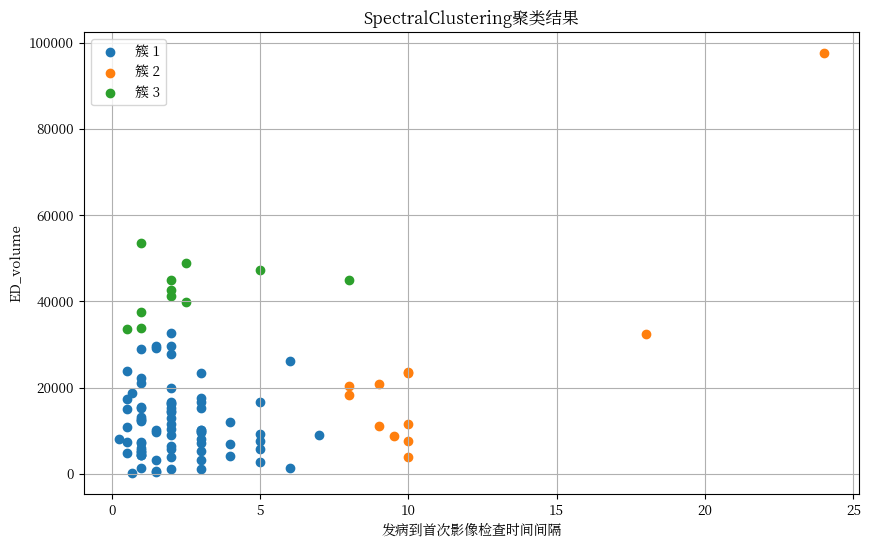

In [34]:
from sklearn.cluster import AffinityPropagation,MiniBatchKMeans,MeanShift,SpectralClustering,AgglomerativeClustering,DBSCAN,Birch
# 应用K均值聚类，选择k=3
sc = SpectralClustering(n_clusters=3, random_state=42).fit(clustering_data_scaled)  # 使用标准化后的数据进行聚类
labels = sc.labels_  # 获取每个数据点所属的簇标签

# 将聚类标签添加到filtered_data数据框中
filtered_data['Cluster'] = labels  # 添加一个名为 'Cluster' 的新列，用于存储聚类标签

print("SpectralClustering")
LK.append(metrics.silhouette_score(clustering_data_scaled,labels,metric='euclidean'))
CH.append(metrics.calinski_harabasz_score(clustering_data_scaled,labels))
DB.append(metrics.davies_bouldin_score(clustering_data_scaled,labels))
print(LK)
print(CH)
print(DB)

# 绘制聚类结果
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据
    plt.scatter(cluster_data['发病到首次影像检查时间间隔'], cluster_data['ED_volume'], label=f'簇 {i+1}')  # 绘制散点图，每个簇一个颜色

plt.xlabel('发病到首次影像检查时间间隔')  # 设置x轴标签
plt.ylabel('ED_volume')  # 设置y轴标签
plt.legend()  # 显示图例
plt.title('SpectralClustering聚类结果')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形

Birch
[0.53027000908404, 0.5483341865810208, 0.5357476166261158, 0.5121954761591124]
[69.7508547764095, 59.03111335351649, 59.7680046274278, 59.05960825904654]
[0.7757775779920446, 0.7870254674551816, 0.744521090181845, 0.5101284362863677]


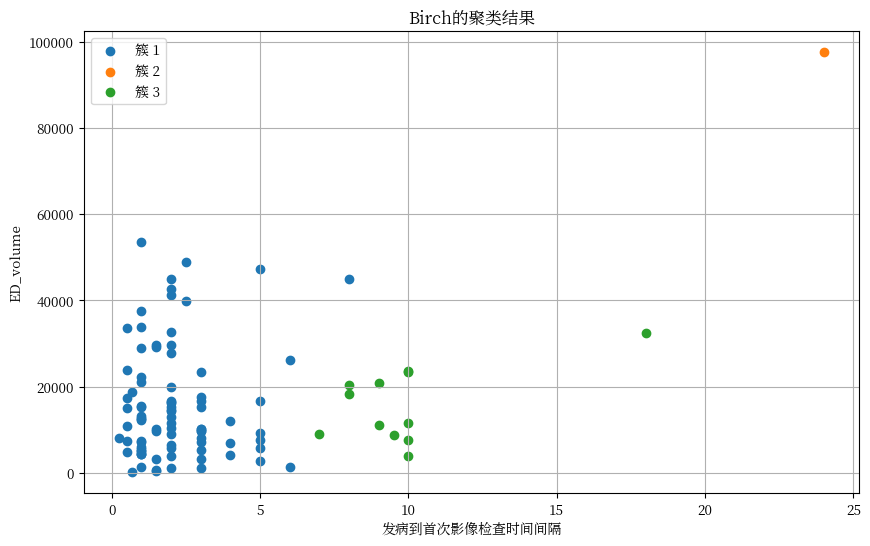

In [35]:
from sklearn.cluster import AffinityPropagation,MiniBatchKMeans,MeanShift,SpectralClustering,AgglomerativeClustering,DBSCAN,Birch
# 应用K均值聚类，选择k=3
b = Birch(n_clusters=3).fit(clustering_data_scaled)  # 使用标准化后的数据进行聚类
labels = b.labels_  # 获取每个数据点所属的簇标签

# 将聚类标签添加到filtered_data数据框中
filtered_data['Cluster'] = labels  # 添加一个名为 'Cluster' 的新列，用于存储聚类标签

print("Birch")
LK.append(metrics.silhouette_score(clustering_data_scaled,labels,metric='euclidean'))
CH.append(metrics.calinski_harabasz_score(clustering_data_scaled,labels))
DB.append(metrics.davies_bouldin_score(clustering_data_scaled,labels))
print(LK)
print(CH)
print(DB)

# 绘制聚类结果
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据
    plt.scatter(cluster_data['发病到首次影像检查时间间隔'], cluster_data['ED_volume'], label=f'簇 {i+1}')  # 绘制散点图，每个簇一个颜色

plt.xlabel('发病到首次影像检查时间间隔')  # 设置x轴标签
plt.ylabel('ED_volume')  # 设置y轴标签
plt.legend()  # 显示图例
plt.title('Birch的聚类结果')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形

AgglomerativeClustering
[0.53027000908404, 0.5483341865810208, 0.5357476166261158, 0.5121954761591124, 0.5511973322234579]
[69.7508547764095, 59.03111335351649, 59.7680046274278, 59.05960825904654, 68.31009198953345]
[0.7757775779920446, 0.7870254674551816, 0.744521090181845, 0.5101284362863677, 0.7443854957912762]


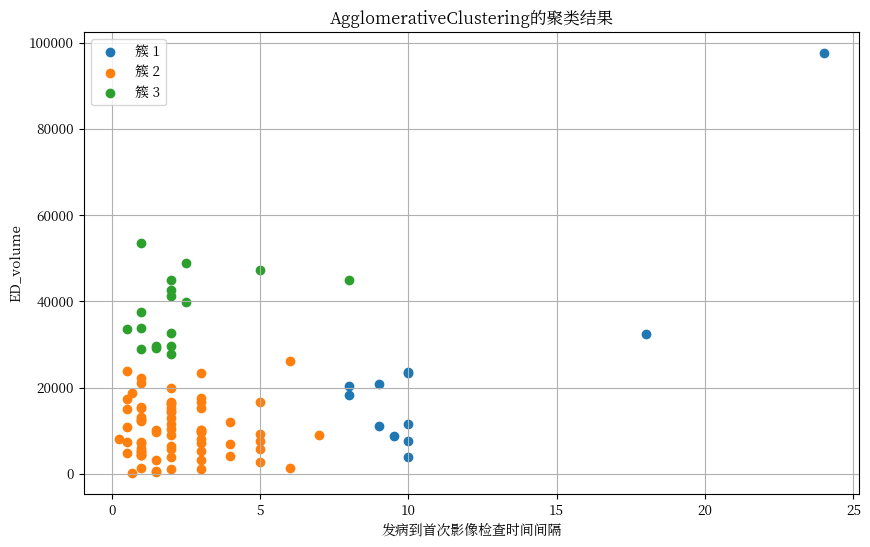

In [36]:
from sklearn.cluster import AffinityPropagation,MiniBatchKMeans,MeanShift,SpectralClustering,AgglomerativeClustering,DBSCAN,Birch
# 应用K均值聚类，选择k=3
ac = AgglomerativeClustering(n_clusters=3).fit(clustering_data_scaled)  # 使用标准化后的数据进行聚类
labels = ac.labels_  # 获取每个数据点所属的簇标签

# 将聚类标签添加到filtered_data数据框中
filtered_data['Cluster'] = labels  # 添加一个名为 'Cluster' 的新列，用于存储聚类标签

print("AgglomerativeClustering")
LK.append(metrics.silhouette_score(clustering_data_scaled,labels,metric='euclidean'))
CH.append(metrics.calinski_harabasz_score(clustering_data_scaled,labels))
DB.append(metrics.davies_bouldin_score(clustering_data_scaled,labels))
print(LK)
print(CH)
print(DB)

# 绘制聚类结果
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据
    plt.scatter(cluster_data['发病到首次影像检查时间间隔'], cluster_data['ED_volume'], label=f'簇 {i+1}')  # 绘制散点图，每个簇一个颜色

plt.xlabel('发病到首次影像检查时间间隔')  # 设置x轴标签
plt.ylabel('ED_volume')  # 设置y轴标签
plt.legend()  # 显示图例
plt.title('AgglomerativeClustering的聚类结果')  # 设置图形标题
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形

y = 17578495.6051x^1 + -2942852.6538x^2 + 236062.2113x^3 + -9010.7326x^4 + 130.6126x^5 + -40501858.2321


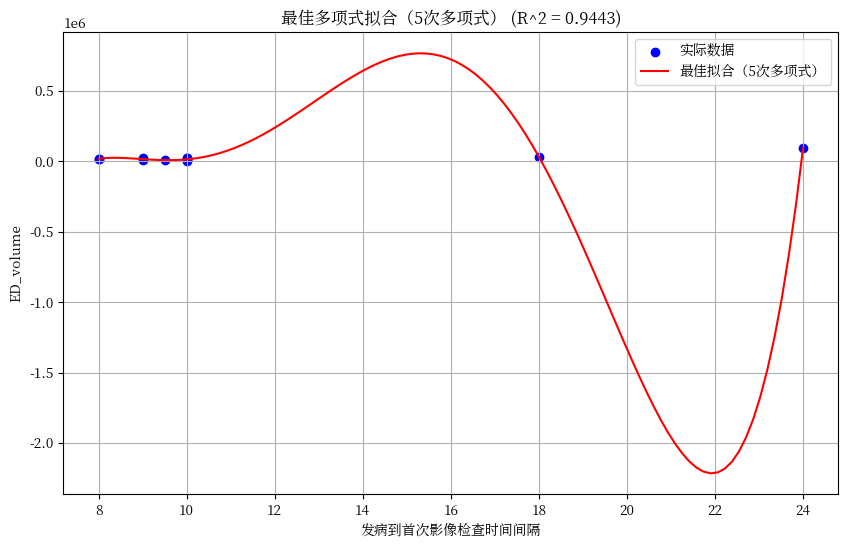

y = -28117.1960x^1 + 24150.6494x^2 + -8685.0929x^3 + 1356.2776x^4 + -75.8713x^5 + 20603.8526


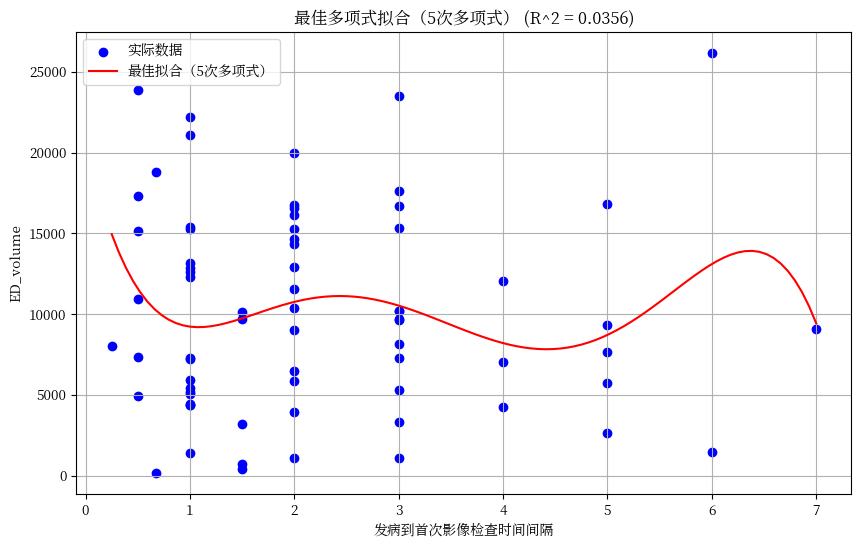

y = 111498.1005x^1 + -123342.0362x^2 + 55080.6033x^3 + -9801.5828x^4 + 579.5127x^5 + 3354.8335


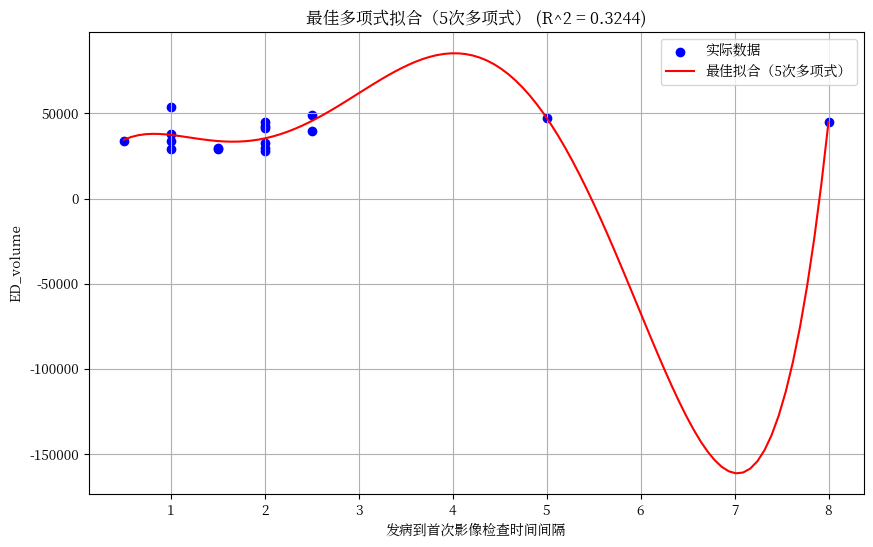

In [37]:
# 为每个簇拟合多项式回归模型
cluster_models = []  # 存储每个簇的回归模型
cluster_r2_scores = []  # 存储每个簇的R^2分数
dd=pd.DataFrame()  # 创建一个新的数据框

for i in range(3):
    cluster_data = filtered_data[filtered_data['Cluster'] == i]  # 获取属于当前簇的数据

    # 准备数据
    X = cluster_data['发病到首次影像检查时间间隔'].values.reshape(-1, 1)  # 特征X：时间间隔
    y = cluster_data['ED_volume'].values  # 目标y：急诊部体积

    # 尝试拟合1到5次多项式回归模型
    degrees = list(range(1, 6))  # 尝试的多项式阶数范围
    models = []  # 存储不同阶数的回归模型
    r2_scores = []  # 存储不同阶数的R^2分数

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X)

        model = LinearRegression().fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)

        models.append(model)
        r2_scores.append(r2)

        # plt.figure(figsize=(10, 6))
        # plt.scatter(X, y, color='blue', label='实际数据')
        # X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        # plt.plot(X_range, model.predict(PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X_range)), color='red', label=f'拟合（{degree}次多项式）')
        # plt.xlabel('发病到首次影像检查时间间隔')
        # plt.ylabel('ED_volume')
        # plt.legend()
        # plt.title(f'多项式拟合（{degree}次多项式） (R^2 = {max(r2_scores):.4f})')
        # plt.grid(True)
        # plt.show()

    # 根据R^2值选择最佳模型
    best_degree = degrees[np.argmax(r2_scores)]
    best_model = models[np.argmax(r2_scores)]

    # 提取模型的系数和截距
    coefficients = best_model.coef_
    intercept = best_model.intercept_

    # 创建多项式方程
    formula_terms = [f"{coefficients[i]:.4f}x^{i+1}" for i in range(len(coefficients))]
    formula = "y = " + " + ".join(formula_terms) + f" + {intercept:.4f}"

    print(formula)

    # 绘制图形
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='实际数据')
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    plt.plot(X_range, best_model.predict(PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X_range)), color='red', label=f'最佳拟合（{best_degree}次多项式）')
    plt.xlabel('发病到首次影像检查时间间隔')
    plt.ylabel('ED_volume')
    plt.legend()
    plt.title(f'最佳多项式拟合（{best_degree}次多项式） (R^2 = {max(r2_scores):.4f})')
    plt.grid(True)
    plt.show()

    cluster_data['predic']=best_model.predict(PolynomialFeatures(degree=best_degree, include_bias=False).fit_transform(X))  # 添加预测值列
    try:
        dd=pd.concat([dd,cluster_data])  # 将每个簇的数据连接到总数据框中
    except:
        pass


In [38]:
dd=dd.sort_values('ID')
dd

,ID,入院首次影像检查流水号,ED_volume,发病到首次影像检查时间间隔,Cluster,predic
0,sub001,20161212002136,48919,2.5,2,45565.497506
1,sub002,20160406002131,23526,3.0,1,10532.356682
2,sub003,20160413000006,32621,2.0,2,35346.798836
3,sub004,20161215001667,22191,1.0,1,9232.619382
4,sub005,20161222000978,47392,5.0,2,47357.894253
...,...,...,...,...,...,...
95,sub096,20180802001789,5951,1.0,1,9232.619382
96,sub097,20181010000767,10227,3.0,1,10532.356682
97,sub098,20180612002507,39868,2.5,2,45565.497506
98,sub099,20180620002296,9653,3.0,1,10532.356682


In [39]:
# 计算残差（实际值与预测值之间的差异）
residuals = dd['ED_volume'] - dd['predic']

# 将残差存储在一个数据框中
residuals_df = filtered_data.copy()  # 复制筛选后的数据到一个新的数据框
residuals_df['残差（亚组）'] = residuals  # 将计算得到的残差添加为新列 'Residuals'

# 选择并显示包括ID、ED_volume、发病到首次影像检查时间间隔以及残差的列
residuals_df[['ID', 'ED_volume', '发病到首次影像检查时间间隔', '残差（亚组）']]


,ID,ED_volume,发病到首次影像检查时间间隔,残差（亚组）
0,sub001,48919,2.5,3353.502494
1,sub002,23526,3.0,12993.643318
2,sub003,32621,2.0,-2725.798836
3,sub004,22191,1.0,12958.380618
4,sub005,47392,5.0,34.105747
...,...,...,...,...
95,sub096,5951,1.0,-3281.619382
96,sub097,10227,3.0,-305.356682
97,sub098,39868,2.5,-5697.497506
98,sub099,9653,3.0,-879.356682


In [40]:
residuals_df.to_excel('残差（亚组）.xlsx')

In [41]:
r2_scores=r2_score(dd['ED_volume'],dd['predic'])
r2_scores

0.828499004970646

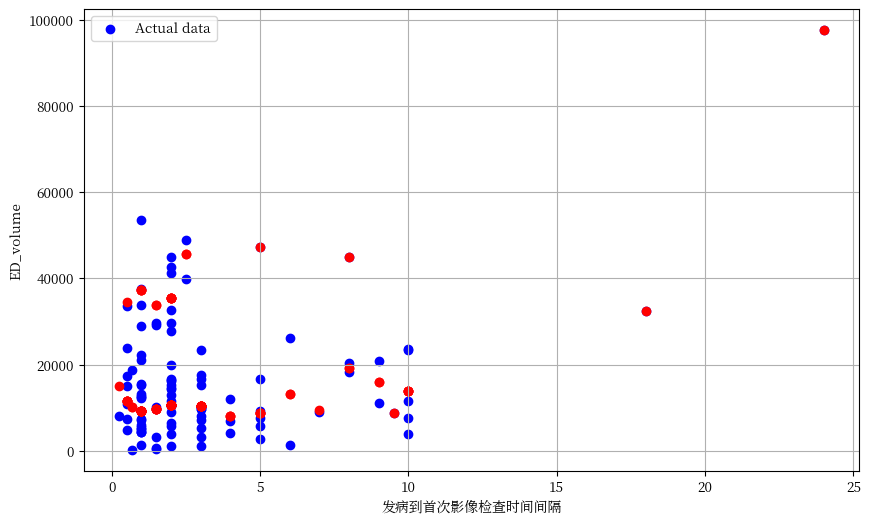

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(dd['发病到首次影像检查时间间隔'], dd['ED_volume'], color='blue', label='Actual data')
plt.scatter(dd['发病到首次影像检查时间间隔'], dd['predic'], color='red')
plt.xlabel('发病到首次影像检查时间间隔')
plt.ylabel('ED_volume')
plt.legend()

plt.grid(True)
plt.show()